<h1>importing the packages</h1>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xgboost as xgb
import seaborn as sns
import time

from math import sqrt
from numpy import loadtxt
from itertools import product
from tqdm import tqdm
from numpy import loadtxt

import gc
from sklearn import preprocessing 
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error,f1_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,StandardScaler
from catboost import CatBoostClassifier
import os

<h6>taking training data and looking at the first five rows</h6>

In [2]:
df=pd.read_csv('train.csv')

In [3]:
df.head(5)

,Severity,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Accident_Type_Code,Max_Elevation,Violations,Adverse_Weather_Metric,Accident_ID
0,Minor_Damage_And_Injuries,49.223744,14,22,71.285324,0.272118,78.04,2,31335.476824,3,0.424352,7570
1,Minor_Damage_And_Injuries,62.465753,10,27,72.288058,0.423939,84.54,2,26024.711057,2,0.352350,12128
2,Significant_Damage_And_Fatalities,63.059361,13,16,66.362808,0.322604,78.86,7,39269.053927,3,0.003364,2181
3,Significant_Damage_And_Serious_Injuries,48.082192,11,9,74.703737,0.337029,81.79,3,42771.499200,1,0.211728,5946
4,Significant_Damage_And_Fatalities,26.484018,13,25,47.948952,0.541140,77.16,3,35509.228515,2,0.176883,9054


<h6>basic statistical information about the data and checking whether null values exist or not

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
Severity                   10000 non-null object
Safety_Score               10000 non-null float64
Days_Since_Inspection      10000 non-null int64
Total_Safety_Complaints    10000 non-null int64
Control_Metric             10000 non-null float64
Turbulence_In_gforces      10000 non-null float64
Cabin_Temperature          10000 non-null float64
Accident_Type_Code         10000 non-null int64
Max_Elevation              10000 non-null float64
Violations                 10000 non-null int64
Adverse_Weather_Metric     10000 non-null float64
Accident_ID                10000 non-null int64
dtypes: float64(6), int64(5), object(1)
memory usage: 937.6+ KB


In [5]:
df.isnull().sum()

Severity                   0
Safety_Score               0
Days_Since_Inspection      0
Total_Safety_Complaints    0
Control_Metric             0
Turbulence_In_gforces      0
Cabin_Temperature          0
Accident_Type_Code         0
Max_Elevation              0
Violations                 0
Adverse_Weather_Metric     0
Accident_ID                0
dtype: int64

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Safety_Score,10000.0,41.876406,16.138072,0.000000,30.593607,41.278539,52.511416,100.000000
Days_Since_Inspection,10000.0,12.931100,3.539803,1.000000,11.000000,13.000000,15.000000,23.000000
Total_Safety_Complaints,10000.0,6.564300,6.971982,0.000000,2.000000,4.000000,9.000000,54.000000
Control_Metric,10000.0,65.145324,11.882934,0.000000,56.927985,65.587967,73.336372,100.000000
Turbulence_In_gforces,10000.0,0.381495,0.121301,0.134000,0.293665,0.365879,0.451346,0.882648
Cabin_Temperature,10000.0,79.969331,2.759739,74.740000,77.960000,79.540000,81.560000,97.510000
Accident_Type_Code,10000.0,3.814900,1.902577,1.000000,2.000000,4.000000,5.000000,7.000000
Max_Elevation,10000.0,32001.803282,9431.995196,831.695553,25757.636908,32060.336419,38380.641513,64297.651218
Violations,10000.0,2.012200,1.039980,0.000000,1.000000,2.000000,3.000000,5.000000
Adverse_Weather_Metric,10000.0,0.255635,0.381128,0.000316,0.012063,0.074467,0.354059,2.365378


<h6>counting number of unique value and checking whether unwanted type exists

In [7]:
columns=[x for x in df.columns]

In [8]:
for i in columns:
    print(i)
    print(df[i].unique())
    print(df[i].nunique())
    print("\n")

Severity
['Minor_Damage_And_Injuries' 'Significant_Damage_And_Fatalities'
 'Significant_Damage_And_Serious_Injuries' 'Highly_Fatal_And_Damaging']
4


Safety_Score
[49.22374429 62.46575342 63.05936073 ... 59.36073059 77.80821918
 14.61187215]
1175


Days_Since_Inspection
[14 10 13 11 15 18  5  6 12  7  8 17  9 16 20 19 21  3  4  1 23 22  2]
23


Total_Safety_Complaints
[22 27 16  9 25  0 10  4 40 11  2 14  1  3  5  7 20 28 12  8 15 18 35  6
 17 13 19 31 33 26 29 24 21 30 44 39 34 23 54 32 37 36 38 43]
44


Control_Metric
[ 71.28532361  72.28805834  66.36280766  74.70373747  47.94895169
  73.33637192  62.8532361   60.80218778  69.2342753   57.42935278
  80.21877849  62.80765725  68.96080219  78.66909754  83.54603464
  85.5515041   68.00364631  37.83044667  61.48587056  41.56791249
  73.24521422  74.93163172  80.5834093   47.26526892  66.1349134
  61.62260711  70.78395624  70.32816773  48.13126709  74.65815861
  48.63263446  76.75478578  44.71285324  60.61987238  55.60619872
  41.02096627

  34.68550593  60.20966272]
952


Turbulence_In_gforces
[0.27211756 0.42393869 0.3226044  ... 0.68791273 0.49966895 0.19386296]
1117


Cabin_Temperature
[78.04 84.54 78.86 81.79 77.16 78.63 88.04 83.48 78.24 79.56 81.15 77.8
 77.23 80.78 81.63 82.08 80.82 82.2  78.37 81.62 79.31 78.21 78.97 76.19
 78.07 90.87 76.75 77.03 79.75 78.78 78.29 77.27 78.7  79.42 77.18 76.8
 81.86 81.26 78.62 77.52 76.39 76.89 75.35 80.35 80.   79.12 79.53 75.2
 83.6  84.13 77.68 76.2  76.95 78.84 76.37 79.63 82.06 81.06 78.16 79.76
 78.6  81.16 75.21 81.94 78.39 79.85 86.42 82.66 78.75 88.27 79.89 82.49
 77.33 76.02 79.84 78.28 78.59 87.05 83.45 78.13 78.56 78.66 79.58 78.46
 77.95 78.17 79.25 84.76 76.94 81.48 79.74 77.38 78.49 77.1  76.09 85.61
 79.72 78.31 77.62 80.98 83.19 77.04 82.75 78.93 87.34 80.44 77.34 81.57
 80.47 78.48 82.18 80.05 78.36 87.23 80.27 81.92 80.07 78.22 77.49 79.61
 80.6  79.36 76.78 77.99 77.36 80.79 76.53 78.87 81.84 77.98 78.52 76.33
 82.39 82.93 76.83 78.77 79.16 76.58 79.29 80.6

<h6>assigning the type with significant number 

In [9]:
df["Severity"].replace("Minor_Damage_And_Injuries", 0 ,inplace= True)
df["Severity"].replace("Significant_Damage_And_Fatalities", 1 ,inplace= True)
df["Severity"].replace("Significant_Damage_And_Serious_Injuries", 2 ,inplace= True)
df["Severity"].replace("Highly_Fatal_And_Damaging", 3 ,inplace= True)

In [10]:
df.groupby(["Accident_Type_Code"])["Accident_ID"].nunique()

Accident_Type_Code
1    1171
2    1791
3    1752
4    2057
5     738
6    1215
7    1276
Name: Accident_ID, dtype: int64

<h5>feature engineering

In [11]:
df_count = df.groupby(["Accident_Type_Code", "Severity"])["Severity"].agg({"no" : "count"})
mask = df_count.groupby(level=0).agg('idxmax')
df_count1 = df_count.loc[mask['no']]
df_count1["no"] = df_count1["no"]/ df.groupby(["Accident_Type_Code"])["Accident_ID"].nunique()
# df_count.drop(["no"], axis = 1, inplace= True)
df_count1 = df_count1.reset_index()
df_count1.columns = ["Accident_Type_Code", "Severity_max","Severity_count"]

C:\Users\Sanketh\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version. Use                 named aggregation instead.

    >>> grouper.agg(name_1=func_1, name_2=func_2)

  """Entry point for launching an IPython kernel.


In [12]:
df_count1

,Accident_Type_Code,Severity_max,Severity_count
0,1,3,0.444919
1,2,0,0.570073
2,3,2,0.589612
3,4,3,0.572679
4,5,0,0.474255
5,6,2,0.591770
6,7,1,0.469436


In [13]:
df = df.merge(df_count1, on = ["Accident_Type_Code"], how = "left")

In [14]:
df.drop(["Accident_Type_Code"], axis = 1, inplace = True)

In [15]:
df.head(5)

,Severity,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Max_Elevation,Violations,Adverse_Weather_Metric,Accident_ID,Severity_max,Severity_count
0,0,49.223744,14,22,71.285324,0.272118,78.04,31335.476824,3,0.424352,7570,0,0.570073
1,0,62.465753,10,27,72.288058,0.423939,84.54,26024.711057,2,0.352350,12128,0,0.570073
2,1,63.059361,13,16,66.362808,0.322604,78.86,39269.053927,3,0.003364,2181,1,0.469436
3,2,48.082192,11,9,74.703737,0.337029,81.79,42771.499200,1,0.211728,5946,2,0.589612
4,1,26.484018,13,25,47.948952,0.541140,77.16,35509.228515,2,0.176883,9054,2,0.589612


<h4>visulization of statistical inference about the data

In [16]:
X = df.drop(["Severity", "Accident_ID"], axis = 1)
Y = df["Severity"].values

In [17]:
l_quan = ['Safety_Score','Control_Metric','Turbulence_In_gforces','Cabin_Temperature','Max_Elevation','Adverse_Weather_Metric','Total_Safety_Complaints','Severity_count']
l_cato = ["Violations" , "Days_Since_Inspection", "Severity_max"]

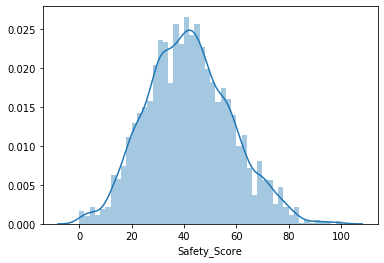

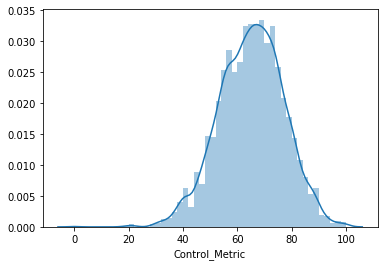

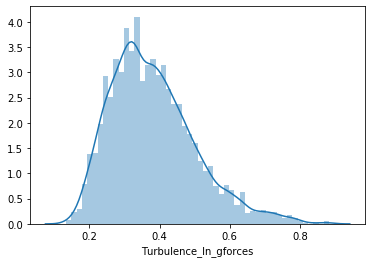

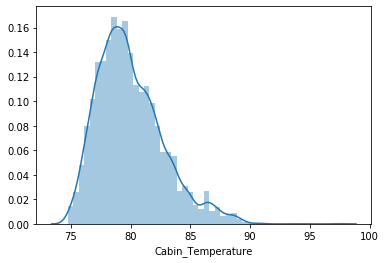

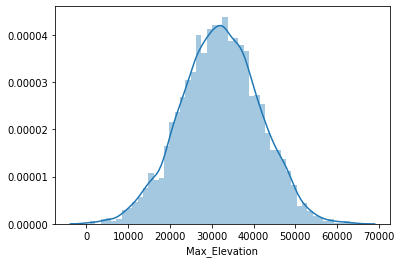

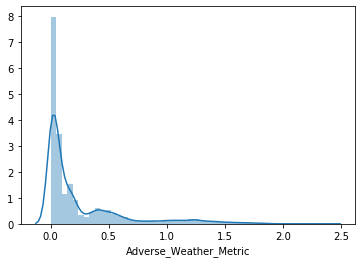

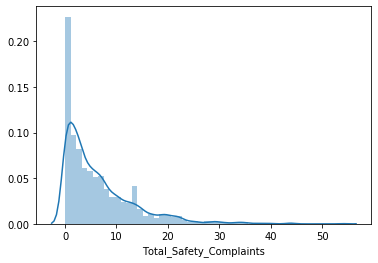

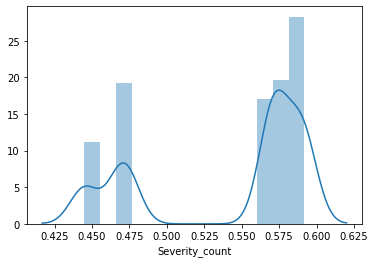

In [18]:
for a in l_quan:
    sns.distplot(X[a])
    plt.show()

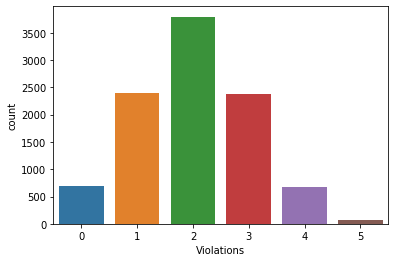

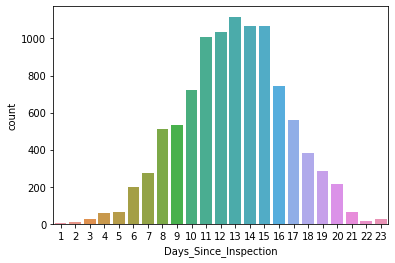

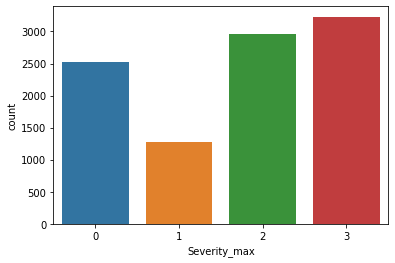

In [19]:
for a in l_cato:
    sns.countplot(X[a])
    plt.show()

<h4>making the features to follow normal distribution by taking logarithm of it and standard scaling the features

In [20]:
X["Total_Safety_Complaints"] = np.log(X["Total_Safety_Complaints"] + 1)

In [21]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler().fit(X[l_quan])

In [22]:
x_quan = pd.DataFrame(ss.transform(X[l_quan]),columns = l_quan, index = X.index )
X[l_quan] = x_quan
X.head()

,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Max_Elevation,Violations,Adverse_Weather_Metric,Severity_max,Severity_count
0,0.455303,14,1.611091,0.516733,-0.901749,-0.699134,-0.070649,3,0.442701,0,0.498631
1,1.275888,10,1.819935,0.601122,0.349922,1.656279,-0.633736,2,0.253773,0,0.498631
2,1.312673,13,1.290165,0.102462,-0.485516,-0.401990,0.770528,3,-0.661939,1,-1.295291
3,0.384562,11,0.726805,0.804422,-0.366593,0.659758,1.141883,1,-0.115208,2,0.846932
4,-0.953841,13,1.741256,-1.447221,1.316177,-1.018021,0.371883,2,-0.206638,2,0.846932


<h4>splitting the dataset into train and test intializing the xgbclassifier

In [29]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.25, random_state=42)

In [30]:
from xgboost import XGBClassifier
xgbclass = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, eta=0.05, gamma=0.3,
              learning_rate=0.23, max_delta_step=0, max_depth=9,
              min_child_weight=1, missing=None, n_estimators=650, n_jobs=-1,
              nthread=None, num_rounds=200, objective='multi:softprob',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=None, silent=None, subsample=0.8, verbosity=1)

<h3> fitting the dtaset to the model and predicting the test dataset and getting the acccuracy

In [31]:
xgbclass.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, eta=0.05, gamma=0.3,
              learning_rate=0.23, max_delta_step=0, max_depth=9,
              min_child_weight=1, missing=None, n_estimators=650, n_jobs=-1,
              nthread=None, num_rounds=200, objective='multi:softprob',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=None, silent=None, subsample=0.8, verbosity=1)

In [32]:
y_pred=xgbclass.predict(x_test)

In [38]:
accuracy_score(y_test,y_pred)

0.9576